<a href="https://colab.research.google.com/github/vitoriaselista/Titanic-Analysis/blob/main/TitanicAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Data Analysis
*Survival predict based on data*



> 
>The Titanic dataset provides a detailed account of the passengers aboard the ill-fated ship that sank on April 15, 1912. The data includes information on the passengers' demographics, such as age, gender, passenger class, and embarkation port, as well as their survival status.
> 
> After analyzing the data, several trends emerge. The most significant factor that influenced survival was gender, with females having a much higher survival rate than males. Age was also a significant factor, with children having a higher survival rate than adults. Passenger class also played a role, with first-class passengers having a higher survival rate than second or third-class passengers.
>  
The size of the passenger's family also played a role in survival, with those traveling alone having a lower survival rate than those traveling with family members. Embarkation port also had a small effect on survival, with passengers who embarked from Cherbourg having a higher survival rate than those who embarked from Queenstown or Southampton.
>
> Overall, the analysis suggests that the profile most likely to survive was a **young female** passenger traveling in **first class** with **1-3 family members**, and embarked from **Cherbourg**. 

*However, it is important to note that these conclusions are based on the available data and may not be representative of the entire population of Titanic passengers.*





**1. Problem understanding and definition:** 

With this database we need to complete the analysis of what group of people were most likely to survive, using Exploratory Data Analysis and Machine Learning.

*   Predict whether passenger will survive or not






**2. Data collection and preparation:**

The dataset of the Titanic is available on Kaggle: [www.kaggle.com/c/titanic](https://www.kaggle.com/c/titanic/overview)

For this analysis I will be using the training set (train.csv) file.

* Data content:
```
    Passengerird: Unique identifier for each passenger;
    Survived: Binary indicator. 1 means survived
    Pclass: Passenger class (1 - First class; 2- Second Class; 3- Thrid Class;
    Name: Passenger name;
    Sex: Male or Female;
    Age: Number;
    SibSp: Number of brothers - wives on board;
    Parch: Number of parents-children on board;
    Ticket: Ticket number;
    Fare: Price of ticket;
    Cabin: Cabin number;
    Embarked: Place where the passenger boarded (C=Cherbourg, Q= Queenstown, S= Southampton)


* Import the Titanic dataset



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

train_df = pd.read_csv("titanic.csv")

**3. Data understanding using Exploratory Data Analysis (EDA):**

Exploratory Data Analysis (EDA) is the process of exploring and understanding data to uncover patterns, relationships, and insights. It involves visualizing and summarizing data using graphs, charts, and statistical measures to identify trends, outliers, and other patterns in the data

```head()``` displays the first lines of the dataset



In [16]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


With ``` tail() ``` we can visualize the 10 last lines of the csv document

In [17]:
train_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q




---


Data types visualization and localization of missing data


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB




---


Check duplicated data

In [20]:
train_df.duplicated().sum()

0



---


Resume statistics

In [21]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Conclusion:** In the table above we can see that about 38% of the training set survived the Titanic disaster and that the ages of passengers in this set range from 0.42 to 80 years



---


Survival rate by **Class**

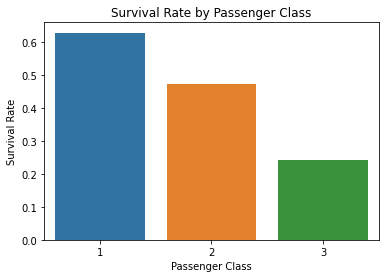

In [22]:
# Calculate survival rate for each passenger class
survival_by_class = train_df.groupby('Pclass')['Survived'].mean()

# Create bar plot
sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()




---


Survival rate by **Age** and **Sex**

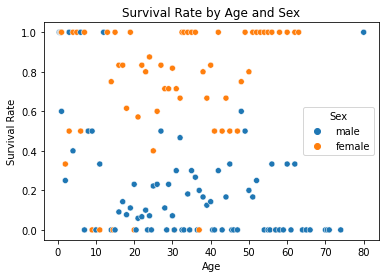

In [23]:
# Calculate survival rate for each combination of age and sex
survival_by_age_sex = train_df.groupby(['Age', 'Sex'])['Survived'].mean().reset_index()

# Create scatter plot
sns.scatterplot(data=survival_by_age_sex, x='Age', y='Survived', hue='Sex')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age and Sex')
plt.show()

From this plot, we can see that in general, women had a higher survival rate than men. We can also see that children and young adults (up to around age 30) tended to have higher survival rates than older adults. 

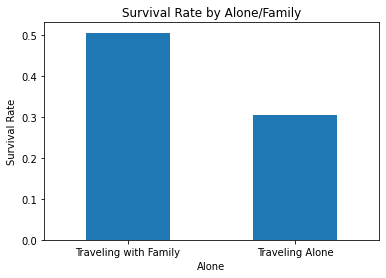

In [25]:
# Check if passenger is traveling alone or with family
train_df['Family'] = train_df['SibSp'] + train_df['Parch']
train_df['Alone'] = np.where(train_df['Family'] == 0, 1, 0)

# Create bar plot of survival rate
grouped = train_df.groupby('Alone')['Survived'].mean()
grouped.plot(kind='bar')
plt.title('Survival Rate by Alone/Family')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['Traveling with Family', 'Traveling Alone'], rotation=0)
plt.show()

From this plot, we can see that passengers traveling with family members had the highest survival rate.



---


Survival rate by **family size**

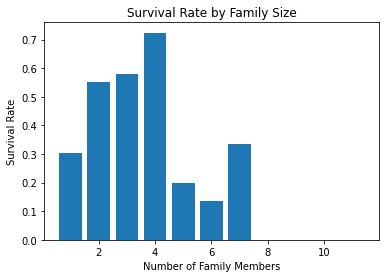

In [26]:
# Calculate total number of family members for each passenger
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

# Calculate survival rate for each group based on family size
survival_by_family_size = train_df.groupby('FamilySize')['Survived'].mean()

# Create bar plot of survival rate by family size
plt.bar(survival_by_family_size.index, survival_by_family_size.values)
plt.xlabel('Number of Family Members')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Family Size')
plt.show()

From this plot, we can see that passengers with 4 family members had the highest survival rate, while passengers traveling alone had the lowest survival rate.



---
Survival rate by **groups**


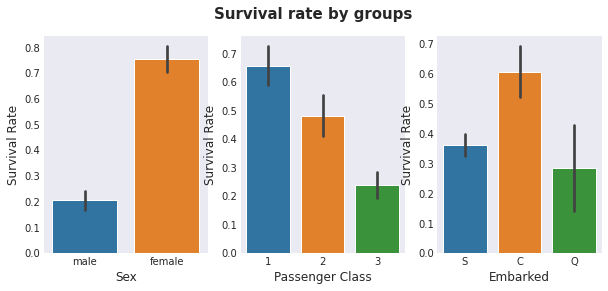

In [39]:

fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(10, 4))
fig.suptitle('Survival rate by groups', fontsize=15, fontweight='bold')

sns.barplot(x='Sex', y='Survived', data=train_df, ax=axis1)
axis1.set_xlabel('Sex', fontsize=12)
axis1.set_ylabel('Survival Rate', fontsize=12)

sns.barplot(x='Pclass', y='Survived', data=train_df, ax=axis2)
axis2.set_xlabel('Passenger Class', fontsize=12)
axis2.set_ylabel('Survival Rate', fontsize=12)

sns.barplot(x='Embarked', y='Survived', data=train_df, ax=axis3)
axis3.set_xlabel('Embarked', fontsize=12)
axis3.set_ylabel('Survival Rate', fontsize=12)

plt.show()

The plot suggests that **gender**, **passenger class**, and **embarkation** port were significant factors in determining a passenger's chances of survival on the Titanic.



---

Survival rate by **age**

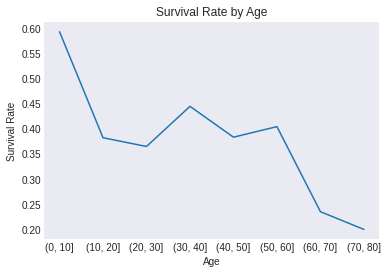

In [31]:
# Remove rows with missing age data
train_df = train_df.dropna(subset=['Age'])

# Calculate survival rate for each age group
age_groups = pd.cut(train_df['Age'], bins=range(0, 90, 10))
survival_by_age = train_df.groupby(age_groups)['Survived'].mean()

# Create line plot of survival rate by age
plt.plot(survival_by_age.index.astype(str), survival_by_age.values)
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age')
plt.show()



From this plot, we can see that passengers in their mid-**20s** had the highest survival rate, while **children under 10** and passengers **over 60** had the lowest survival rates.



---
# Conclusion

 Based on the available data in the Titanic dataset, there are several characteristics that are associated with a higher likelihood of survival:

* Gender: Females had a much higher survival rate than males. In fact, the 
survival rate for females was over 70%, while the survival rate for males was just under 20%.

* Age: Passengers who were children (under the age of 18) had a higher survival rate than adults. In addition, passengers in their mid-20s to early 30s also had a higher survival rate than other age groups.

* Passenger Class: Passengers in first class had a higher survival rate than passengers in second or third class.

* Family Size: Passengers who were traveling alone had a lower survival rate than passengers who were traveling with family members. However, passengers who were traveling with too many family members (more than 4) also had a lower survival rate.

* Embarkation Port: Passengers who embarked from Cherbourg (C) had a higher survival rate than passengers who embarked from Queenstown (Q) or Southampton (S).

> Based on these characteristics, the profile that is most likely to survive would be a **female passenger** who is **under the age of 18**, traveling in **first class** with **1-3 family members**, and embarked from **Cherbourg**. 

#**Model building**

This is a logistic regression created with help of ChatGPT

In [40]:
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv("titanic.csv")


Preprocess the data by removing any unnecessary columns and filling in any missing values:

In [41]:
# Remove unnecessary columns
titanic_df = titanic_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

# Fill in missing age values with the median age
titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df["Age"].median())

# Fill in missing embarked values with the mode
titanic_df["Embarked"] = titanic_df["Embarked"].fillna(titanic_df["Embarked"].mode()[0])


Encode categorical variables using one-hot encoding:

In [42]:
titanic_df = pd.get_dummies(titanic_df, columns=["Sex", "Embarked"])

Split the data into training and testing sets:

In [43]:
from sklearn.model_selection import train_test_split

X = titanic_df.drop("Survived", axis=1)
y = titanic_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Fit a logistic regression model to the training data:

In [44]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Make predictions on the test set and calculate the accuracy of the model:

In [45]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8044692737430168


Use the model to make predictions on new data:

In [46]:
new_passenger = pd.DataFrame({
    "Pclass": [2],
    "Age": [19],
    "SibSp": [3],
    "Parch": [0],
    "Fare": [32],
    "Sex_female": [1],
    "Sex_male": [0],
    "Embarked_C": [1],
    "Embarked_Q": [0],
    "Embarked_S": [0]
})

prediction = logreg.predict(new_passenger)
print("Prediction:", prediction)


Prediction: [1]
